#                                         Intrusion Detection Systems (IDS)

## I-Business Understading

NSL-KDD (for network-based intrusion detection systems (IDS)) is a dataset suggested to solve some of the inherent problems of the parent KDD'99 dataset. This IDS basically helps to determine security of systems and alarming when intrusion is noticed or detected. Choosing NSL-KDD provides insightful analysis using various machine learning algorithms for intrusion detection. Myself expecting to explore intuitive insights of intrusion detection and work on various machine learning algorithms that is reasonable to understand future instance of attacks and its types.



# II-Data Understanding

#### Importation 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

from scipy.io import arff

import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [2]:
dataset_train=pd.read_csv('KDDTrain+.txt',sep=",",header=None)
dataset_test=pd.read_csv('KDDTest+.txt',sep=",",header=None)



# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

dataset_train.columns = columns
dataset_test.columns = columns

# sanity check
dataset_train.head()

dataset_p2 = dataset_train.copy()

In [3]:
dataset_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
dataset_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


#### Missing an Duplicated values 

In [6]:
if dataset_train.isnull().values.any():
    print("This dataset_train has missing values.")
    missing_percentage = dataset_train.isnull().sum() * 100 / len(dataset_train)
    missing_value_df = pd.DataFrame({'missing_count': dataset_train.isnull().sum(), 'missing_percentage': missing_percentage})
    print(missing_value_df[missing_value_df.missing_count != 0])
else:
    print("There are no missing values in this dataset_train.")

if dataset_train.duplicated().any():
    print("This Dataset has duplicated values.")
else:
    print("There are no duplicated values in this dataset_train.")


There are no missing values in this dataset_train.
There are no duplicated values in this dataset_train.


In [7]:
dataset_train.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [8]:
dataset_test.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

#### Our Columns

Netword related features:

        duration: time duration of the connection (quant.)
        protocol type: protocol used in connection (cat., 3 categories)
        service: destination network service used (cat., 70 categories)
        flag: status of the connection (e.g. REJ = connection rejected) (cat., 11 categories)
        src bytes: number of data bytes transferred from source to destination (quant.)
        dst bytes: number of data bytes transferred from destination to source (quant.)
        land: indicator whether port number and IP address of source and destination are equal, if yes = 1, otherwise 0 (binary)
        wrong fragment: number of wrong fragments in connection (quant.)
        urgent: number of urgent packets (quant.)


Connection related features:

        hot: number of ”hot” indicators in the content such as: entering a system directory, creating programs and executing programs (quant.)
        num failed logins: number of failed login attempts (quant.)
        logged in: 1 if successfully logged in, 0 otherwise (binary)
        num compromised: number of ”compromised” conditions (quant.)
        root shell: 1 if root shell is obtained, 0 otherwise (binary)
        su attempted: 1 if ”su root” command attempted or used, 0 otherwise (quant., data set contains value 2)
        num root: number of operations performed as a root or root accesses (quant.)
        num file creations: number of file creation operations (quant.)
        num shells: number of shell prompts (quant.)
        num access files: number of operations on access control files (quant.)
        num outbound cmds: number of outbound commands in an ftp session (quant.)
        is host login: 1 if the login is from root or admin, 0 otherwise (binary)
        is guest login: 1 if the login is from guest, 0 otherwise (binary)

Time related traffic features:

        count: number of connections to the same destination host as the current connection in the past 2 seconds (quant.)
        srv count: number of connections to the same service (port number) as the current connection in the past 2 seconds (quant.)
        serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4) among connections aggregated in count (quant.) 52
        srv serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4) among connections aggregated in srv count (quant.)
        rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in count (quant.)
        srv rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in srv count (quant.)
        diff srv rate: % of connections to the different service among those aggregated in count (quant.)
        srv diff host rate: % of connections that were to different destination machines among the connections aggregated in srv count (quant.)

Host based traffic features:

        dst host count: count of the connections having the same destination IP address (quant.)
        dst host srv count: count of connections having the same port number (quant.)
        dst host same srv rate: % of connections that were to different services, among those in dst host count (quant.)
        dst host diff srv rate: % of connections that were to different services, among those in dst host count (quant.)
    36 dst host same src port rate: % of connections that were to the same source port, among those in dst host srv count (quant.) 54
        dst host srv diff host rate: % of connections that were to different destination machines, among those in dst host srv count (quant.)
        dst host serror rate: % of connections that have activated the s0, s1, s2 or s3 flag (4), among those in dst host count (quant.)
        dst host srv serror rate: % of connections that have activated the s0, s1, s2 or s3 flag (4), among those in dst host srv count (quant.)
        dst host rerror rate: % of connections that have activated the REJ flag (4), among those in dst host count (quant.)
        dst host srv rerror rate: % of connections that have activated the REJ flag (4), among those in dst host srv count (quant.)


### Change the attack column to a binary column 
If Normal = 0 
If Anomalous = 1

In [9]:
dataset=dataset_train.copy()
Results = set(dataset['attack'].values)
Trained_attack = dataset.attack.map(lambda a: 0 if a == 'normal' else 1)
dataset['attack'] = Trained_attack

dataset.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,21


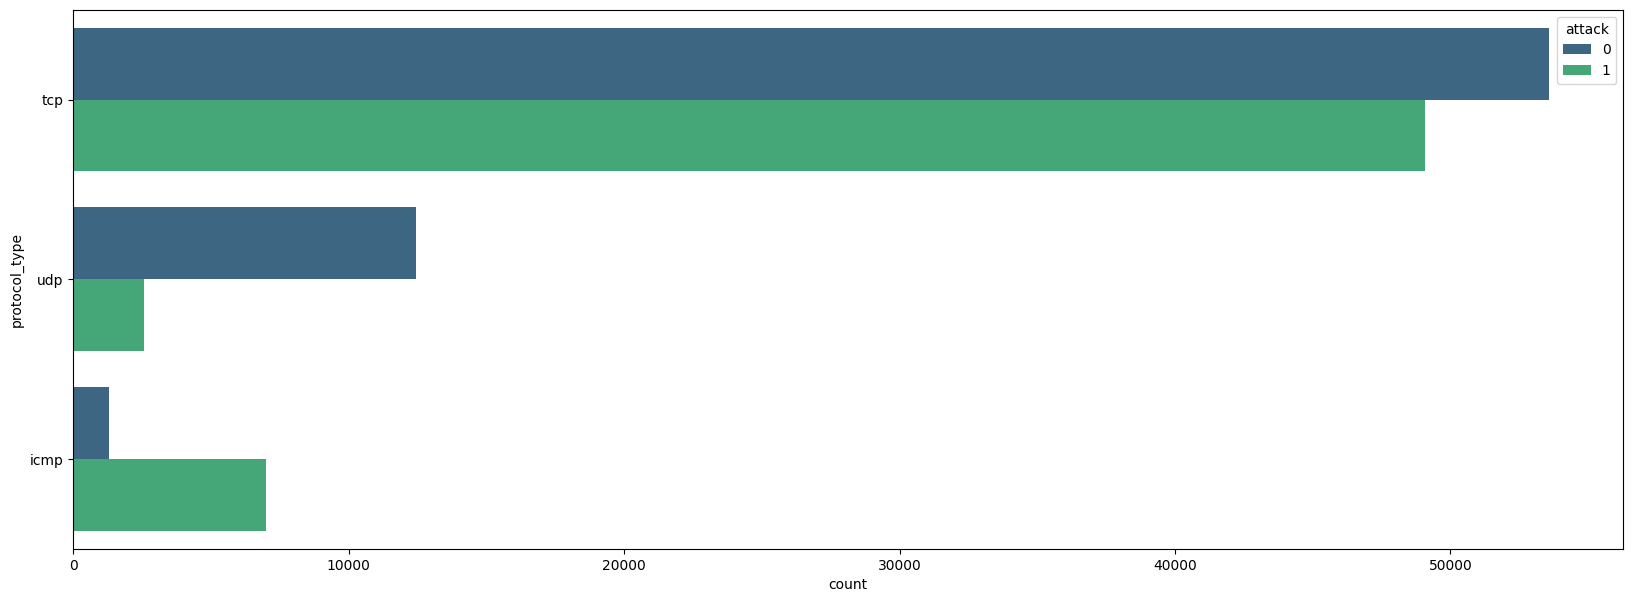

In [10]:
plt.figure(figsize=(20, 7))
sns.countplot(data=dataset, y='protocol_type', hue='attack', palette='viridis')
plt.show()

In this countplot analysis, TCP emerges as the predominant protocol in both normal and anomalous states.

<Axes: xlabel='count', ylabel='service'>

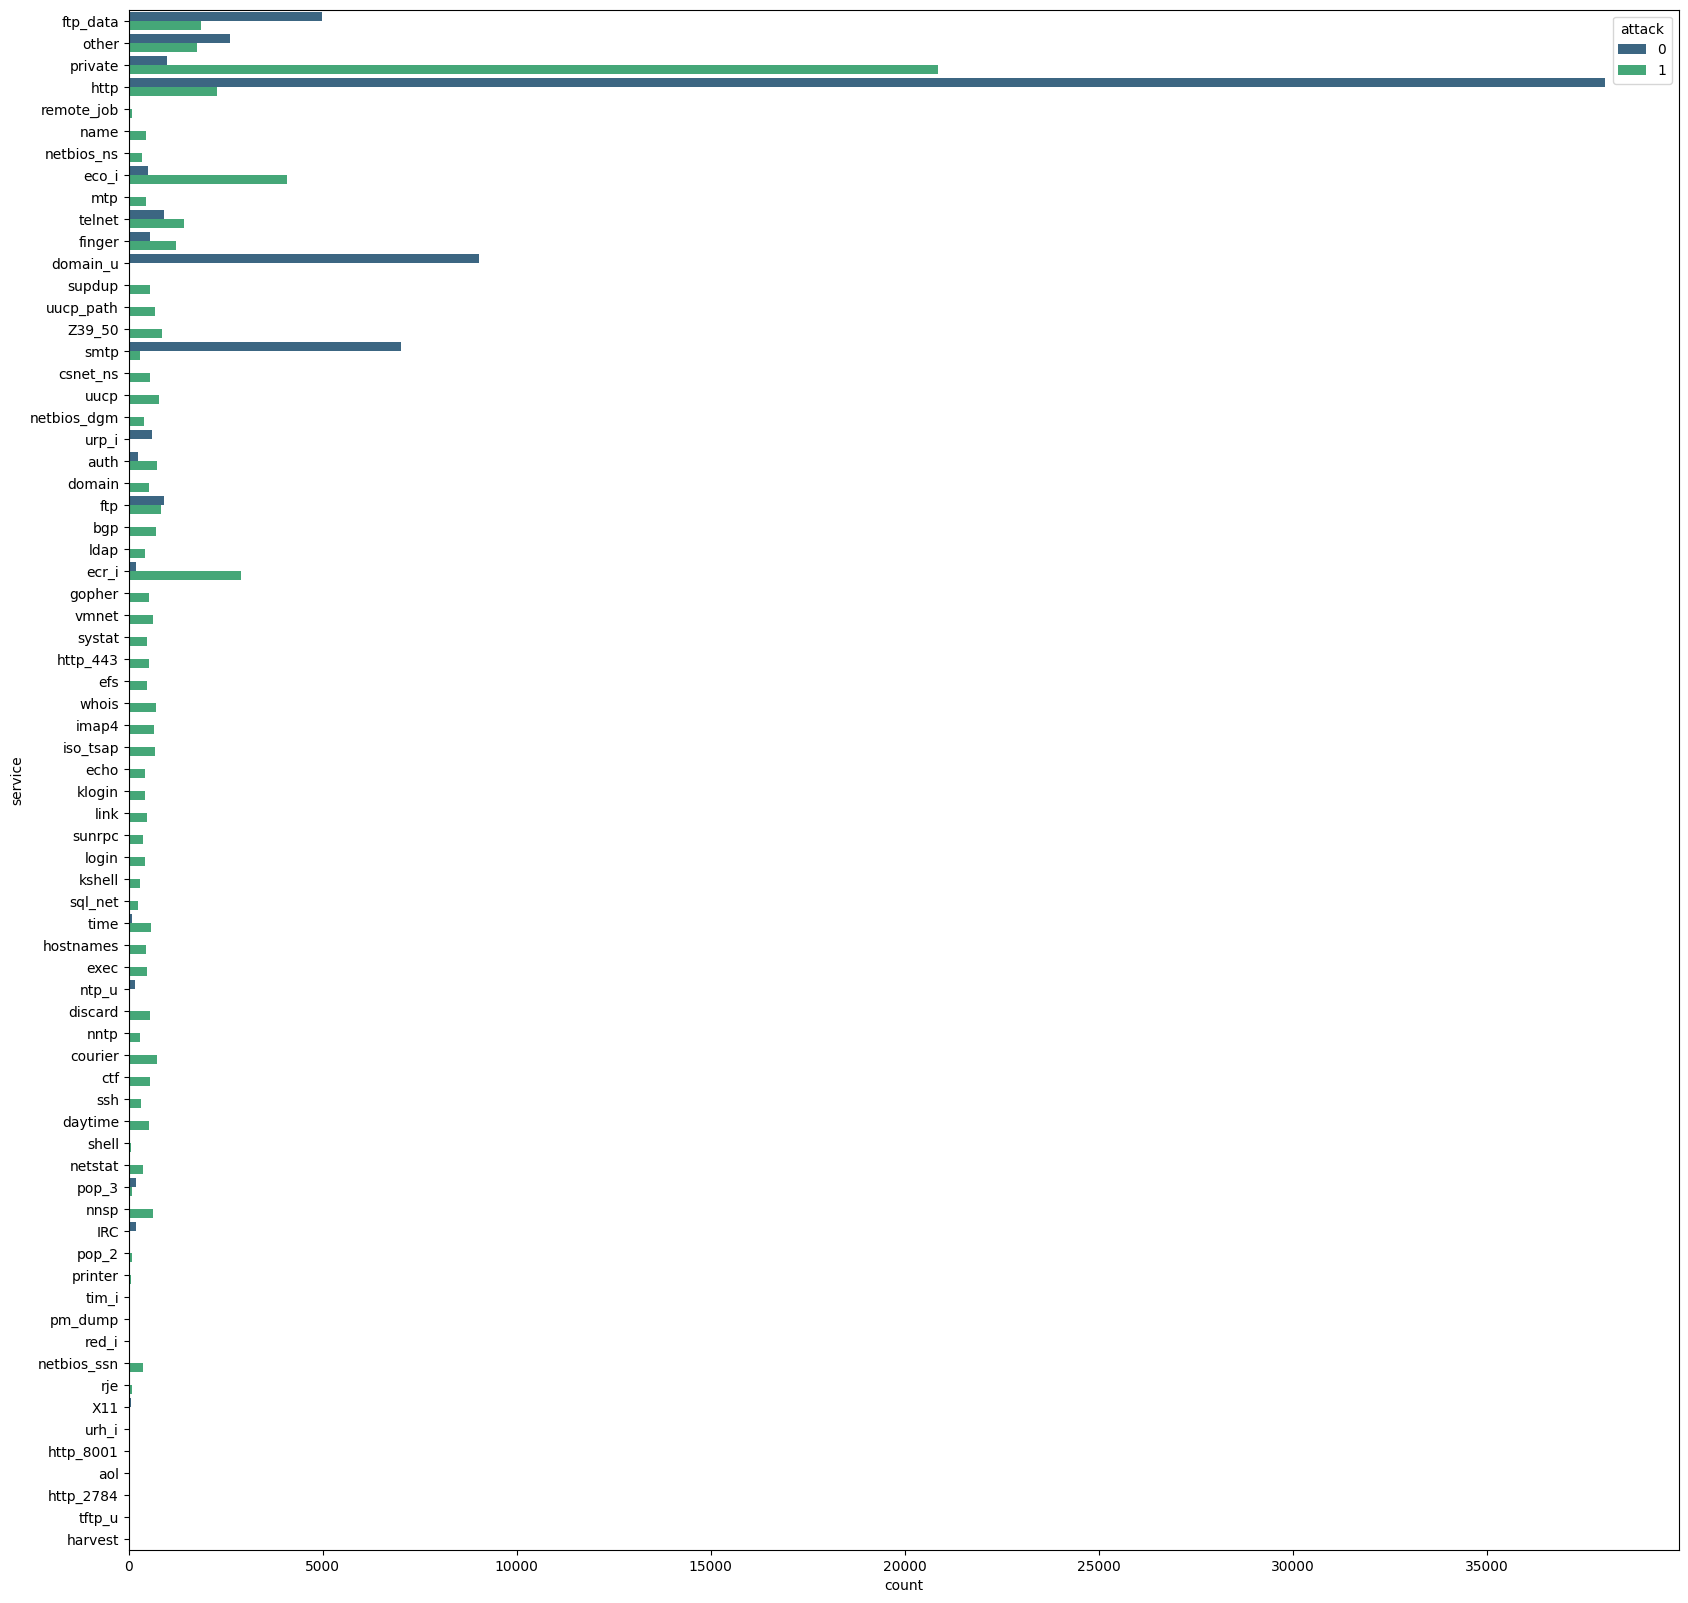

In [11]:
plt.figure(figsize = (20,20))
sns.countplot(data=dataset, y=dataset.service, hue = 'attack', palette="viridis")

In this countplot depicting services, it's evident that HTTP is the dominant service during normal states. Conversely, in anomalous states, a private service emerges as the dominant one.

<Axes: xlabel='count', ylabel='flag'>

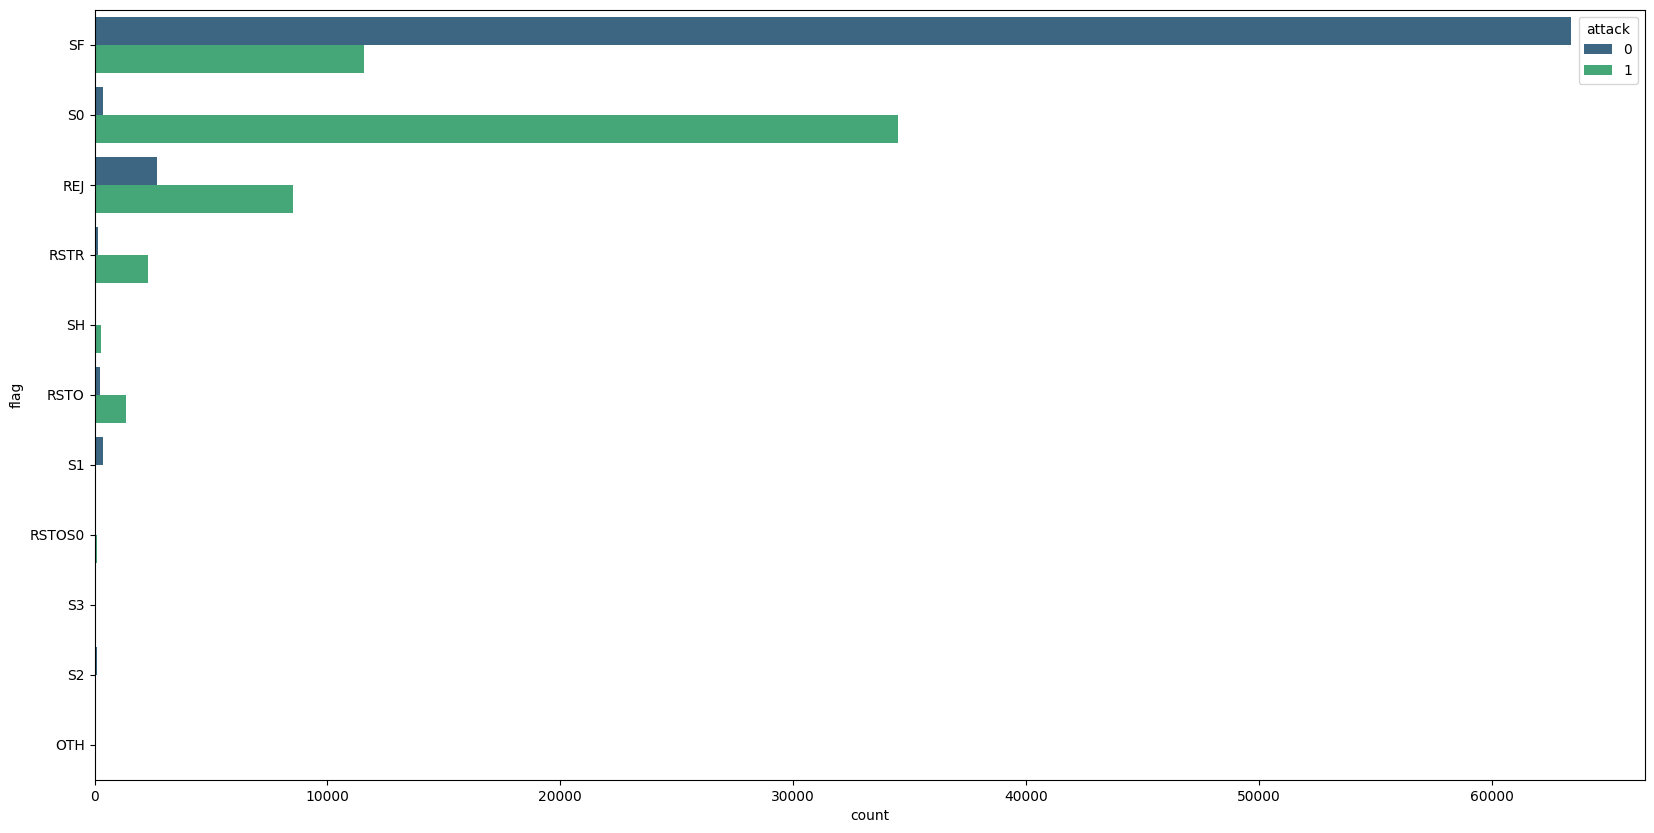

In [12]:
plt.figure(figsize = (20,10))
sns.countplot(data=dataset, y=dataset.flag,hue = 'attack', palette="viridis")

In this countplot analysis Flag, it's evident that SF is the dominant flag during normal states. Conversely, in anomalous states, a SO flag emerges as the dominant one.

# II-Data Preparation

### Handling Outliers

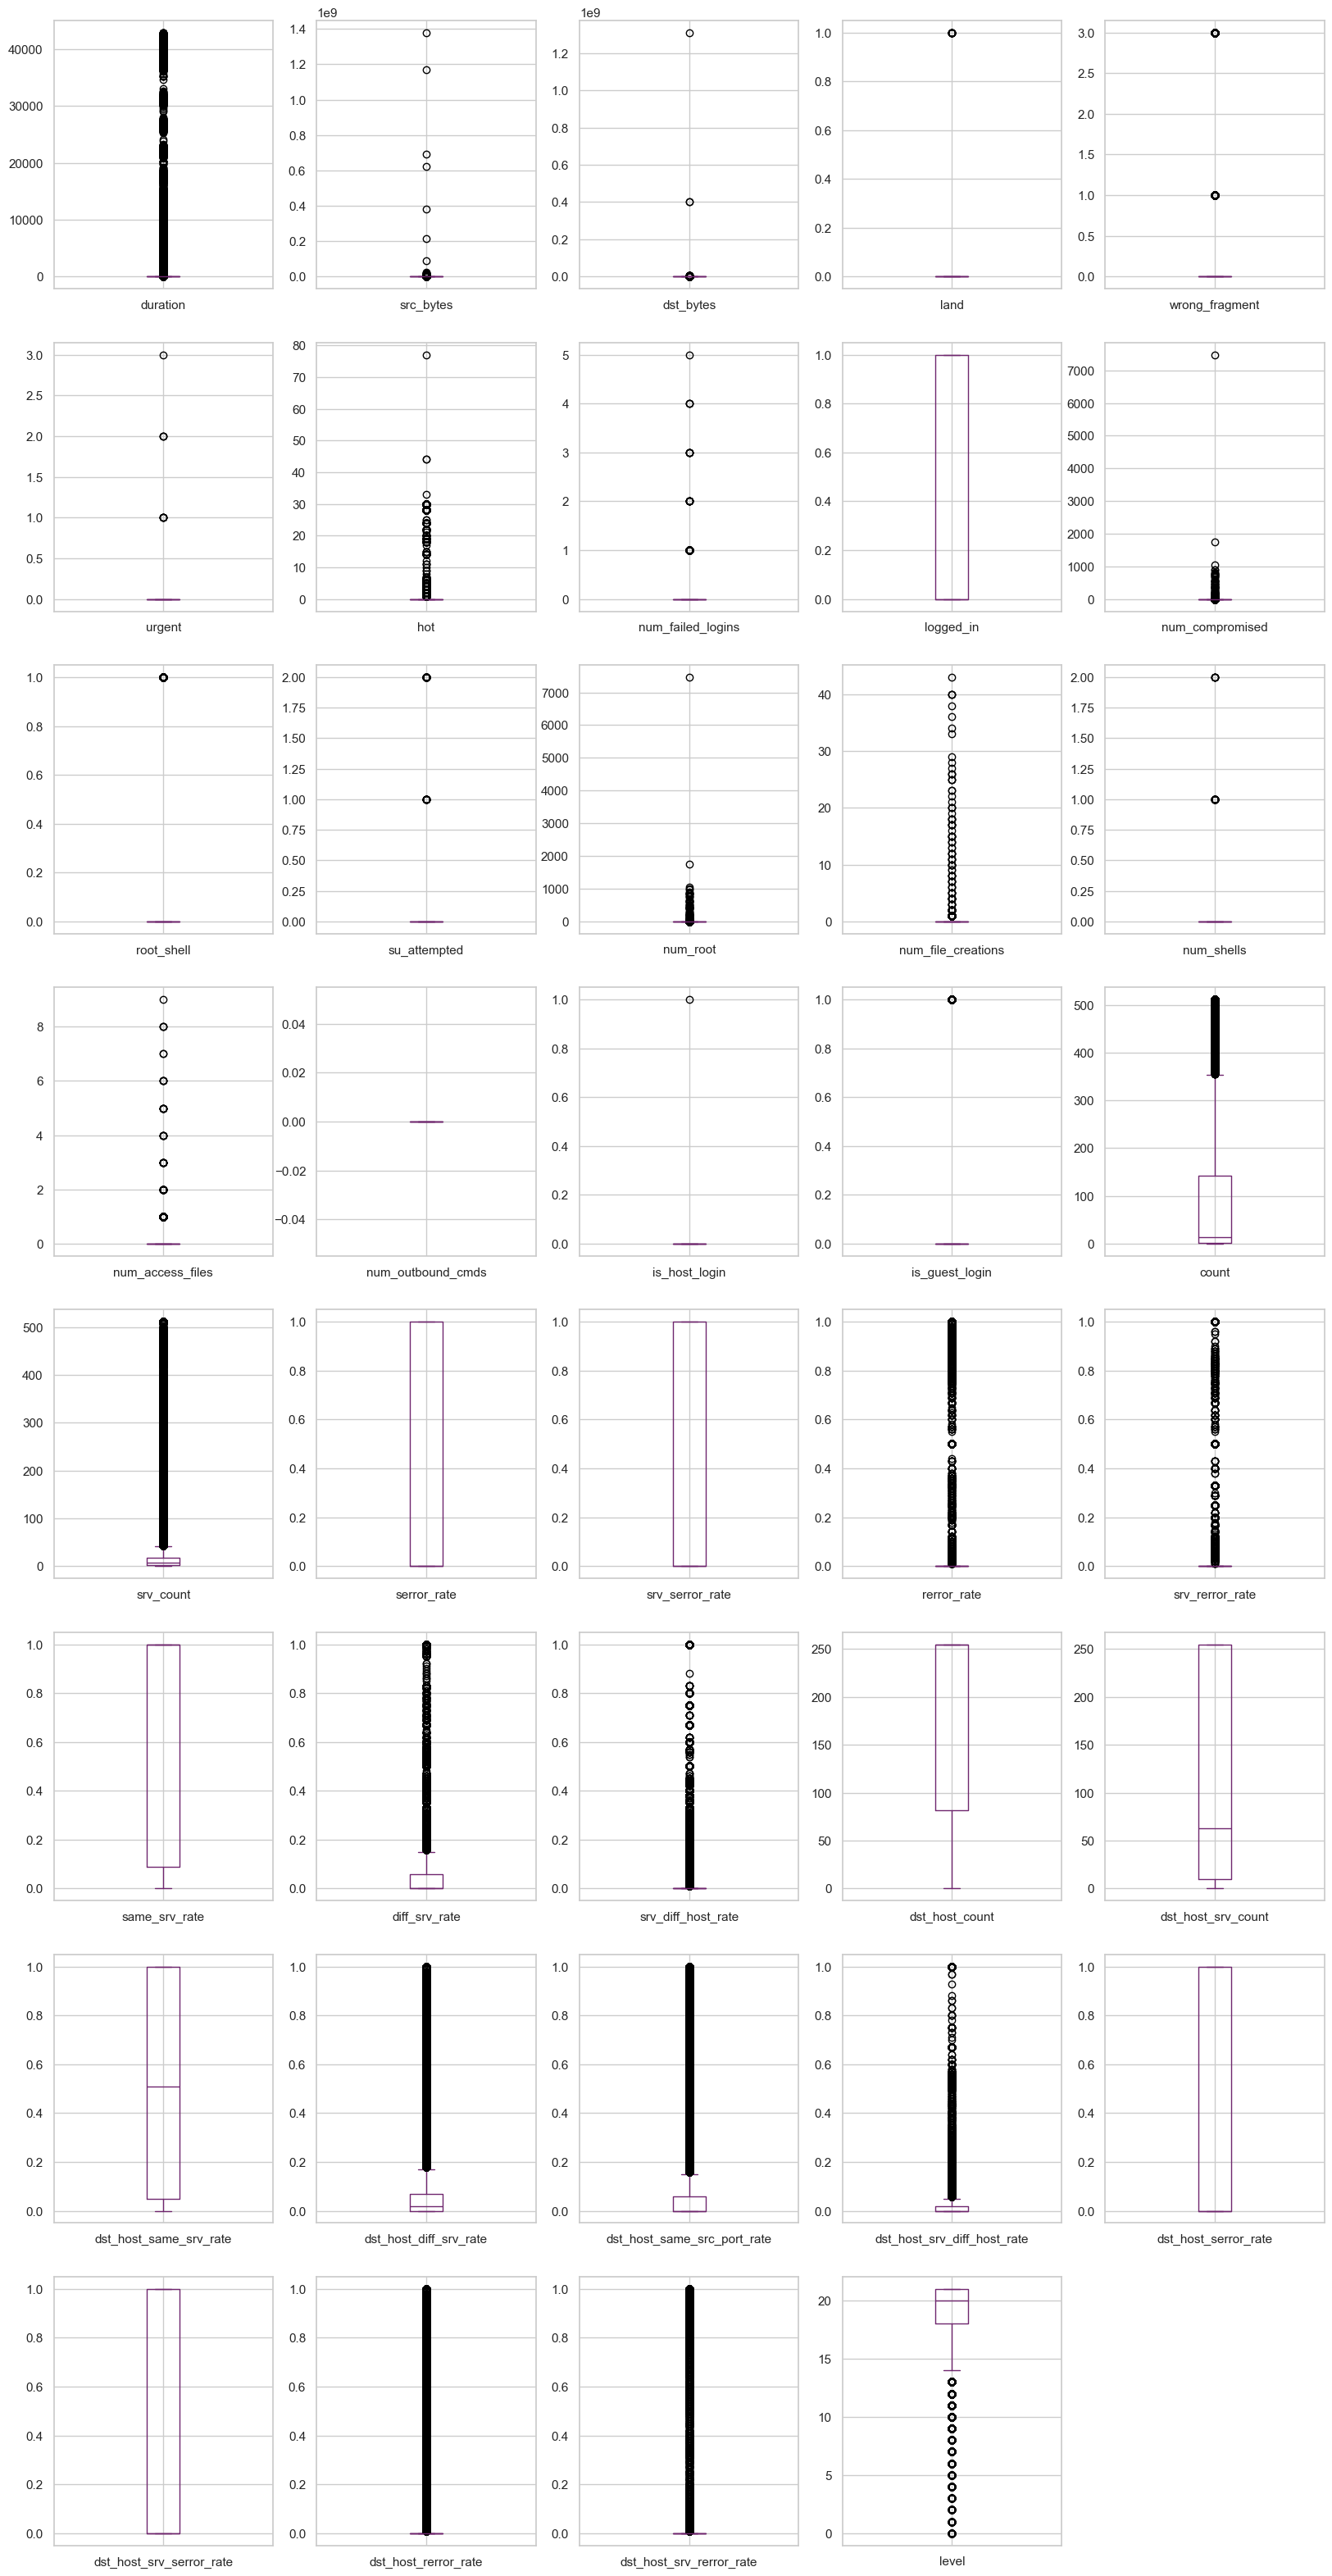

In [13]:
sns.set(style='whitegrid')
dataset_train.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40), color = "#6F266E")
plt.show()

In [14]:
#This function uses the IQR method to identify and count outliers in the selected integer columns of a pandas dataframe.

columns_to_check = dataset_train.select_dtypes(include=['int64']).columns

for column in columns_to_check:
    Q1 = dataset_train[column].quantile(0.25)
    Q3 = dataset_train[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = dataset_train[(dataset_train[column] < lower_bound) | (dataset_train[column] > upper_bound)]

    print(f"Number of outliers in column '{column}': {len(outliers)}")

    

Number of outliers in column 'duration': 10018
Number of outliers in column 'src_bytes': 13840
Number of outliers in column 'dst_bytes': 23579
Number of outliers in column 'land': 25
Number of outliers in column 'wrong_fragment': 1090
Number of outliers in column 'urgent': 9
Number of outliers in column 'hot': 2671
Number of outliers in column 'num_failed_logins': 122
Number of outliers in column 'logged_in': 0
Number of outliers in column 'num_compromised': 1286
Number of outliers in column 'root_shell': 169
Number of outliers in column 'su_attempted': 80
Number of outliers in column 'num_root': 649
Number of outliers in column 'num_file_creations': 287
Number of outliers in column 'num_shells': 47
Number of outliers in column 'num_access_files': 371
Number of outliers in column 'num_outbound_cmds': 0
Number of outliers in column 'is_host_login': 1
Number of outliers in column 'is_guest_login': 1187
Number of outliers in column 'count': 3157
Number of outliers in column 'srv_count': 1

### Encode

In [15]:
ordinal_features = ['protocol_type', 'service', 'flag']
label_encoder = LabelEncoder()

# Encoding ordinal features directly in the original dataset
for feature in ordinal_features:
    dataset_train[feature] = label_encoder.fit_transform(dataset_train[feature])
    dataset[feature] = label_encoder.fit_transform(dataset_train[feature])

dataset_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


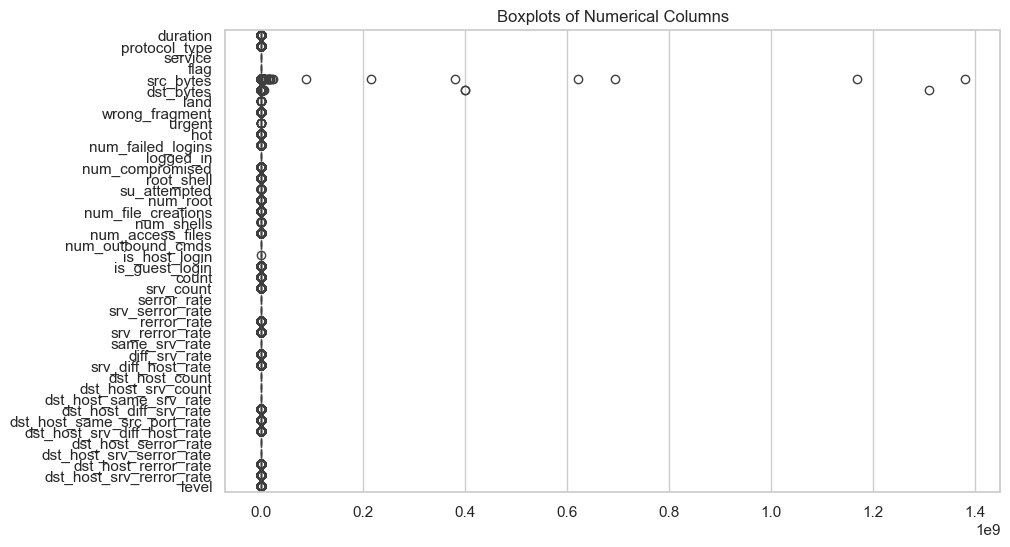

In [16]:

plt.figure(figsize=(10, 6))  
sns.boxplot(data=dataset_train, orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

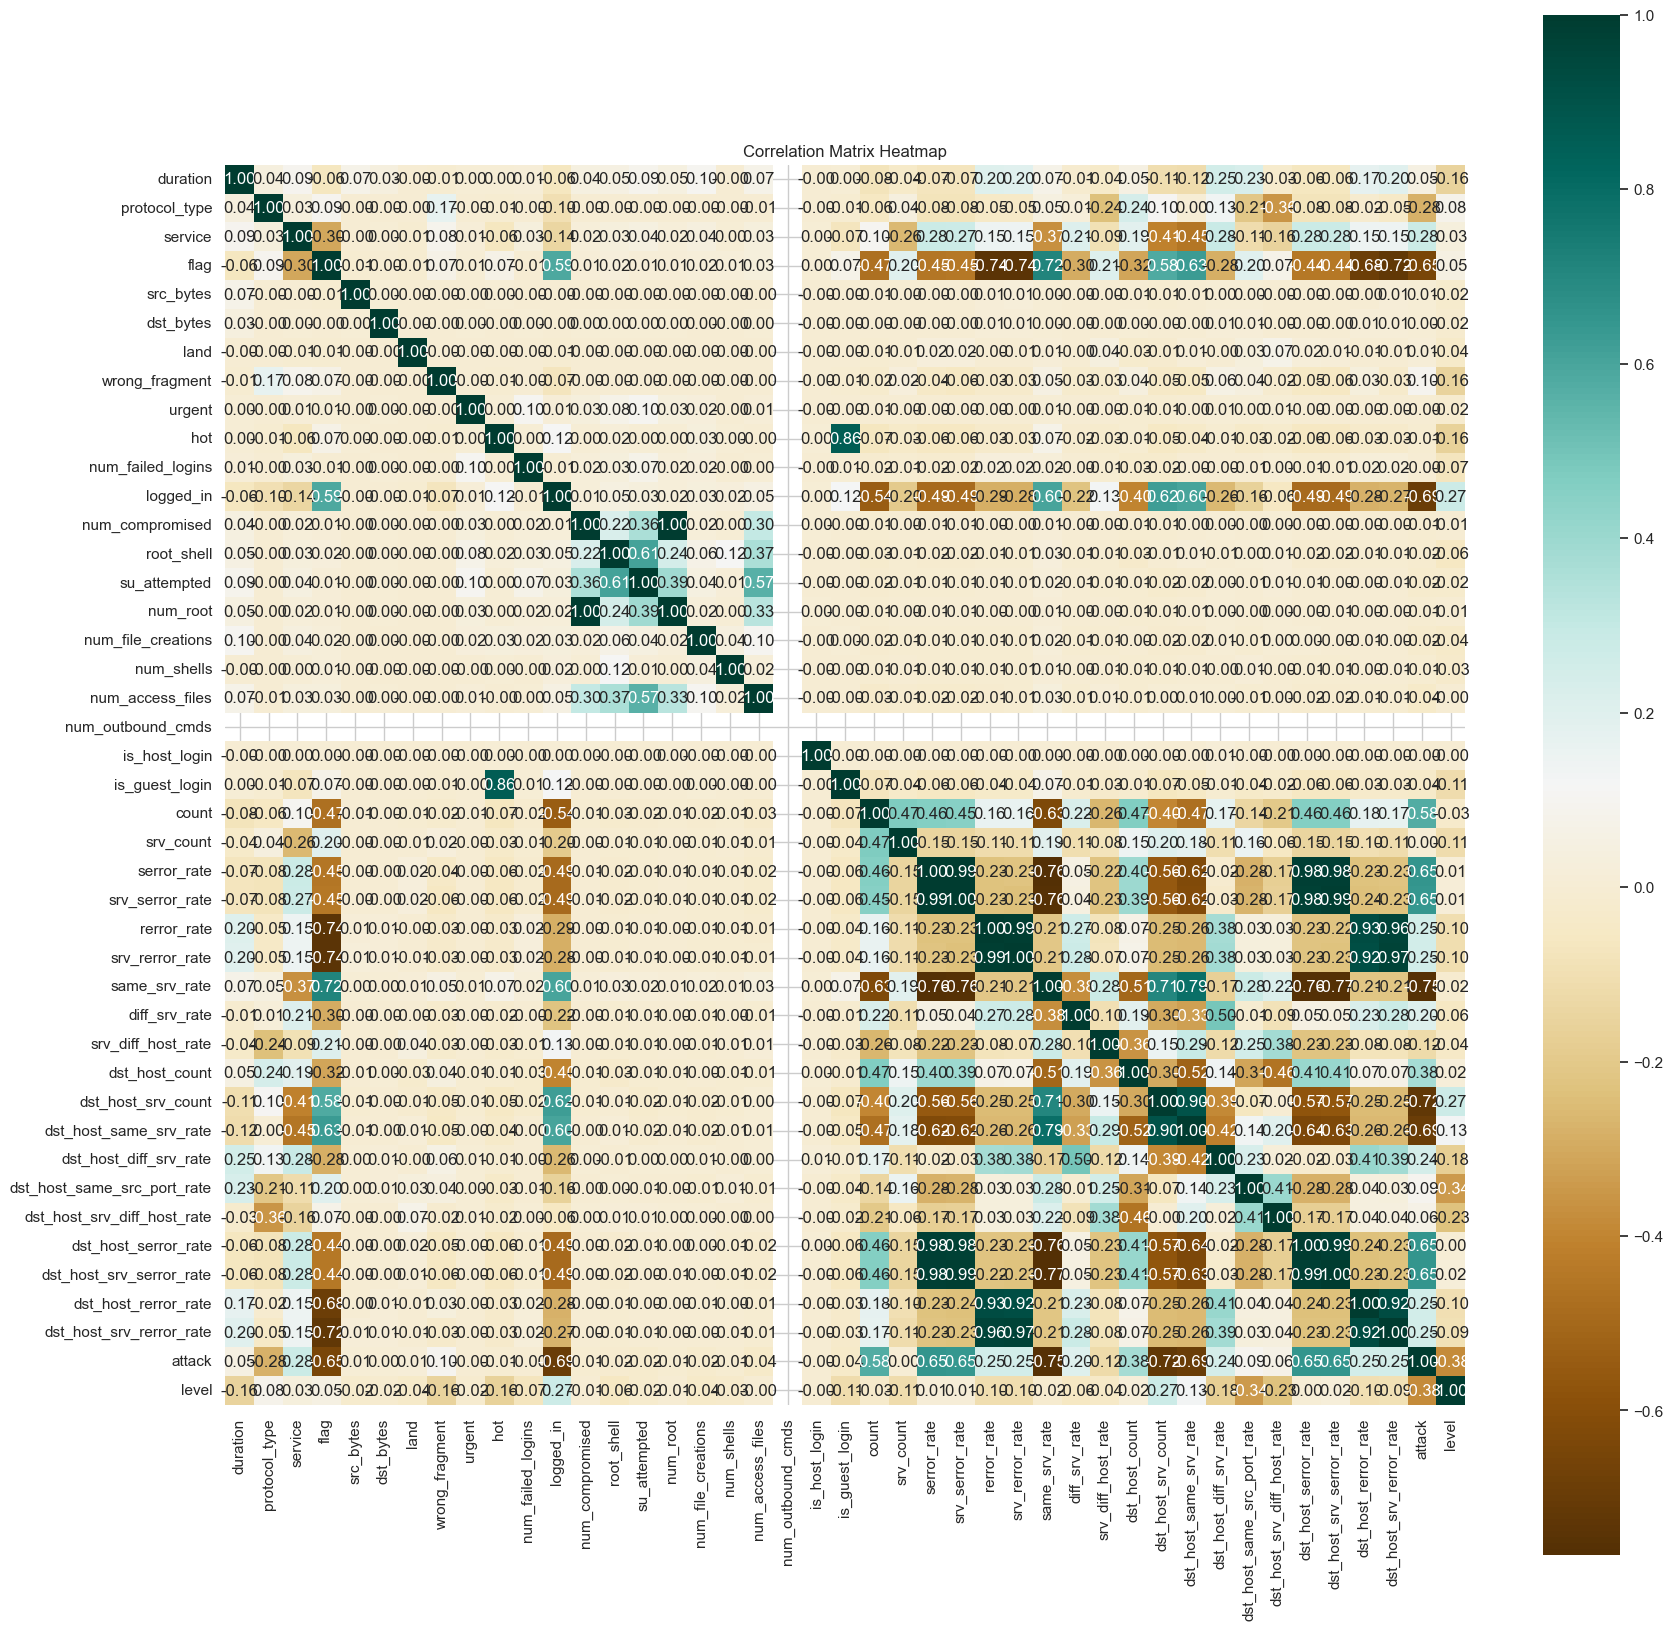

In [17]:
# Calculate the correlation matrix
corr = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(corr, cmap='BrBG', annot=True, fmt=".2f", square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

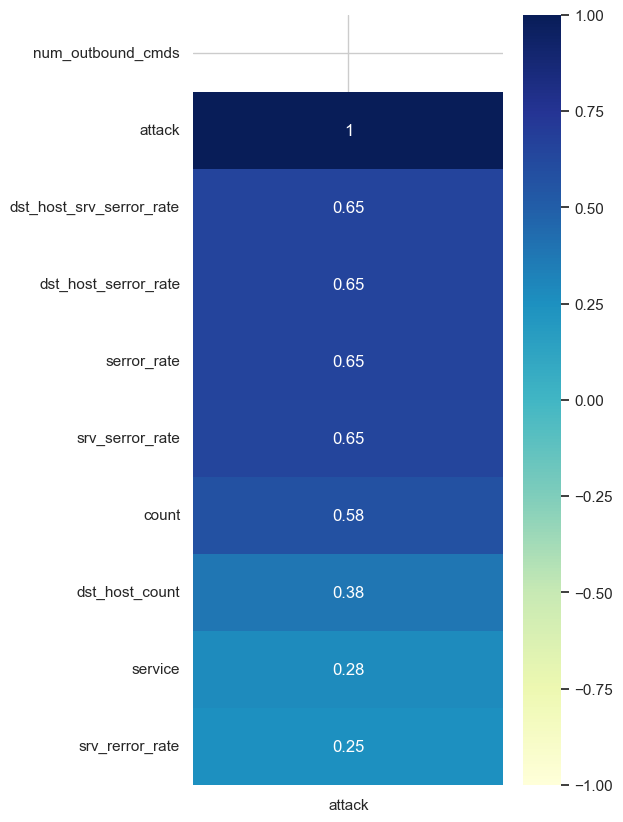

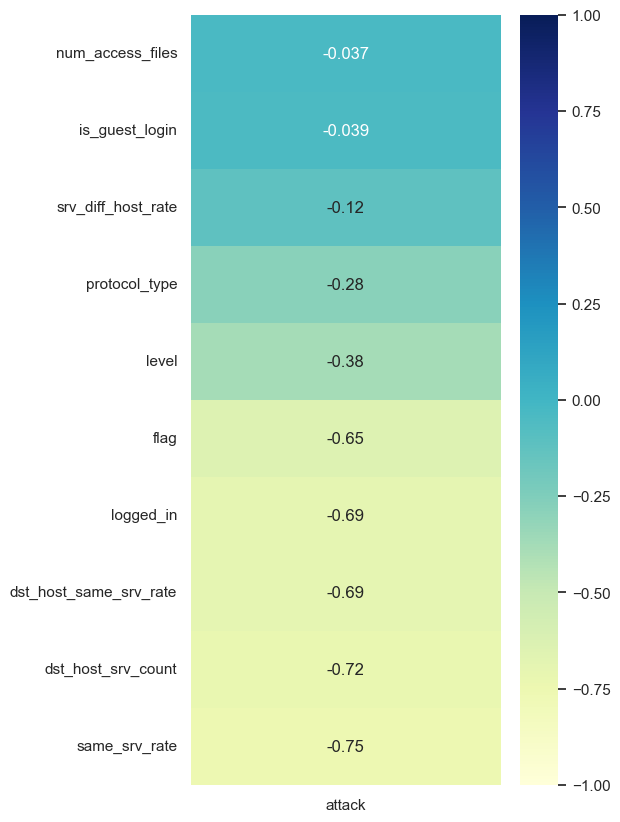

In [18]:
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(dataset.corr()[['attack']].sort_values('attack').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(dataset.corr()[['attack']].sort_values('attack').head(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax)
ax.invert_yaxis()

## BO N ° PREDICTION

In [19]:
dataset_ta = dataset_train.copy()
dataset_ts = dataset_test.copy()

ordinal_features = ['protocol_type', 'service', 'flag']
label_encoder = LabelEncoder()

# Encoding ordinal features directly in the original dataset
for feature in ordinal_features:
    dataset_ta[feature] = label_encoder.fit_transform(dataset_ta[feature])
    dataset_ts[feature] = label_encoder.fit_transform(dataset_ts[feature])

dataset_ta

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In the following code, we'll categorize the attacks into four distinct groups: DoS, U2R, R2L, and Probe while ensuring that the normal values remain unchanged.

In [20]:

# Mapping the subclasses to their corresponding classes
mapping = {
    'dos': ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm','dos'],
    'probe': ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan','probe'],
    'u2r': ['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm','u2r'],
    'r2l': ['ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail','r2l', 'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop']
}

# Function
def map_subclass_to_class(attack):
    for key, value in mapping.items():
        if attack in value:
            return key
    return 'normal'  

dataset_ta['attack'] = dataset_ta['attack'].apply(map_subclass_to_class)
dataset_ts['attack'] = dataset_ts['attack'].apply(map_subclass_to_class)


dataset_ta.iloc[0:1750]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0,1,9,5,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
1746,0,1,24,9,229,1901,0,0,0,0,...,1.00,0.00,0.12,0.04,0.00,0.00,0.00,0.00,normal,21
1747,0,1,24,9,296,1630,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
1748,0,1,28,5,0,0,0,0,0,0,...,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,20


In [21]:
x_train = dataset_ta.drop(columns=['attack']) 
y_train = dataset_ta['attack']
x_test = dataset_ts.drop(columns=['attack']) 
y_test = dataset_ts['attack']

### Decision Tree :

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz


In [23]:
clf = DecisionTreeClassifier()

# Entraînement du modèle sur les données d'entraînement
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred



for index, (predicted, actual) in enumerate(zip(y_pred, y_test)):
    if predicted != actual:
        print(f"Index {index}: Predicted={predicted}, Actual={actual}")

Index 3: Predicted=normal, Actual=probe
Index 4: Predicted=normal, Actual=probe
Index 7: Predicted=normal, Actual=r2l
Index 9: Predicted=normal, Actual=r2l
Index 21: Predicted=dos, Actual=probe
Index 30: Predicted=normal, Actual=dos
Index 33: Predicted=probe, Actual=normal
Index 35: Predicted=normal, Actual=probe
Index 37: Predicted=r2l, Actual=u2r
Index 47: Predicted=normal, Actual=dos
Index 48: Predicted=dos, Actual=probe
Index 54: Predicted=normal, Actual=r2l
Index 57: Predicted=probe, Actual=r2l
Index 58: Predicted=normal, Actual=dos
Index 60: Predicted=normal, Actual=r2l
Index 61: Predicted=normal, Actual=r2l
Index 77: Predicted=probe, Actual=dos
Index 87: Predicted=normal, Actual=probe
Index 93: Predicted=normal, Actual=r2l
Index 94: Predicted=normal, Actual=r2l
Index 101: Predicted=normal, Actual=r2l
Index 106: Predicted=r2l, Actual=u2r
Index 112: Predicted=probe, Actual=dos
Index 113: Predicted=probe, Actual=dos
Index 119: Predicted=normal, Actual=r2l
Index 126: Predicted=norma

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Rapport de classification
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

         dos       0.96      0.80      0.87      7460
      normal       0.70      0.97      0.81      9711
       probe       0.62      0.61      0.62      2421
         r2l       0.88      0.10      0.18      2885
         u2r       1.00      0.07      0.14        67

    accuracy                           0.76     22544
   macro avg       0.83      0.51      0.52     22544
weighted avg       0.80      0.76      0.73     22544



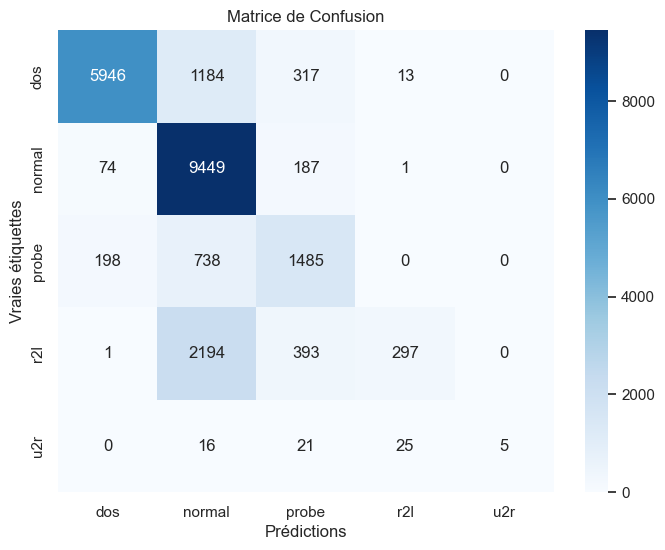


Classe 0:
True Positives (TP): 5946
True Negatives (TN): 14811
False Positives (FP): 273
False Negatives (FN): 1514

Classe 1:
True Positives (TP): 9449
True Negatives (TN): 8701
False Positives (FP): 4132
False Negatives (FN): 262

Classe 2:
True Positives (TP): 1485
True Negatives (TN): 19205
False Positives (FP): 918
False Negatives (FN): 936

Classe 3:
True Positives (TP): 297
True Negatives (TN): 19620
False Positives (FP): 39
False Negatives (FN): 2588

Classe 4:
True Positives (TP): 5
True Negatives (TN): 22477
False Positives (FP): 0
False Negatives (FN): 62


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
# Remplacez predTree par les prédictions de votre modèle et y_test par les étiquettes de test réelles
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer un graphique de la matrice de confusion à l'aide de seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['dos', 'normal', 'probe', 'r2l','u2r'], yticklabels=['dos', 'normal', 'probe', 'r2l','u2r'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

# Calcul des TP, TN, FP, FN pour chaque classe
for i in range(5):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN
    print(f'\nClasse {i}:')
    print(f'True Positives (TP): {TP}')
    print(f'True Negatives (TN): {TN}')
    print(f'False Positives (FP): {FP}')
    print(f'False Negatives (FN): {FN}')

In [26]:
accuracy1 = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy1:.4f}')

precision1 = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
print(f'Precision: {precision1}')

recall1 = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
print(f'Recall: {recall1}')

f1 = 2 * (precision1 * recall1) / (precision1 + recall1)
print(f'F1-score: {f1}')

Accuracy: 0.7622
Precision: [0.95610227 0.69575142 0.61797753 0.88392857 1.        ]
Recall: [0.79705094 0.97302029 0.6133829  0.10294627 0.07462687]
F1-score: [0.8693618  0.81135154 0.61567164 0.18441478 0.13888889]


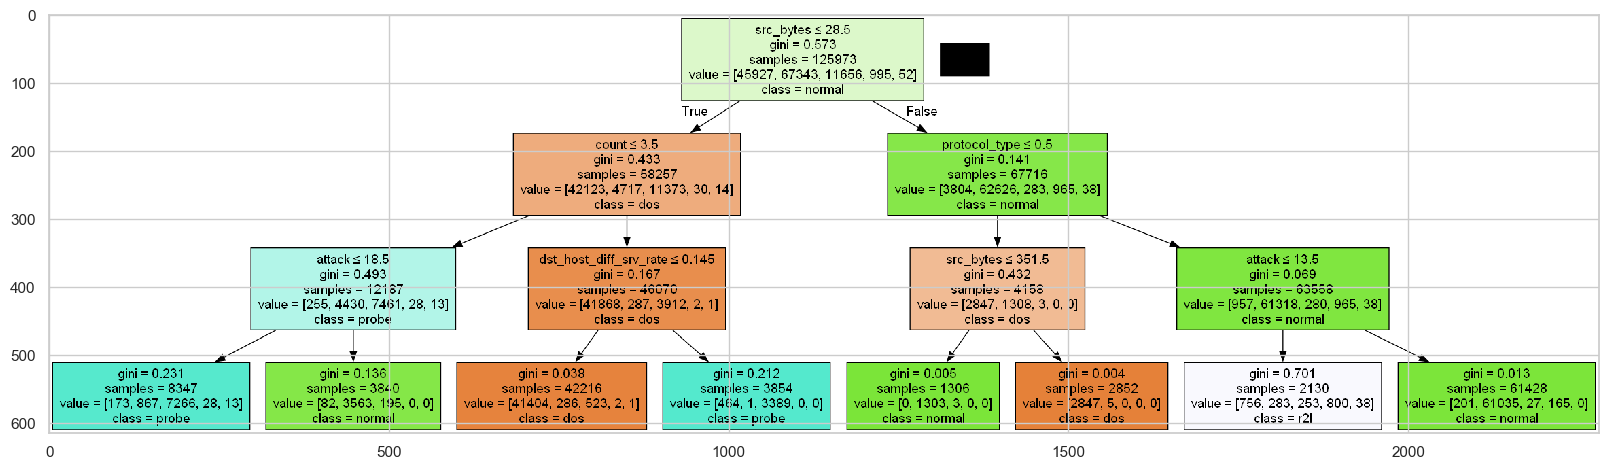

In [27]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

# Assuming dataset is your DataFrame containing the data
featureNames = dataset_ta.columns[0:42]
targetNames = dataset_ta["attack"].unique().tolist()

# Ensure that class_names are strings
class_names = [str(class_name) for class_name in np.unique(y_train)]

# Create a StringIO object to store the DOT data
dot_data = StringIO()

# Use export_graphviz with your parameters
export_graphviz(
    dt,
    feature_names=featureNames,
    out_file=dot_data,
    class_names=class_names,
    filled=True,
    special_characters=True,
    rotate=False
)

# Create the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Write the graph to a PNG file
filename = "Purchased.png"
graph.write_png(filename)

# Display the image using matplotlib
img = mpimg.imread(filename)
plt.figure(figsize=(20, 30))
plt.imshow(img, interpolation='nearest')
plt.show()

In [28]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=list(x_train.columns))

print("Règles de l'arbre de décision:")
print(tree_rules)

Règles de l'arbre de décision:
|--- src_bytes <= 28.50
|   |--- count <= 3.50
|   |   |--- level <= 18.50
|   |   |   |--- class: probe
|   |   |--- level >  18.50
|   |   |   |--- class: normal
|   |--- count >  3.50
|   |   |--- dst_host_diff_srv_rate <= 0.15
|   |   |   |--- class: dos
|   |   |--- dst_host_diff_srv_rate >  0.15
|   |   |   |--- class: probe
|--- src_bytes >  28.50
|   |--- protocol_type <= 0.50
|   |   |--- src_bytes <= 351.50
|   |   |   |--- class: normal
|   |   |--- src_bytes >  351.50
|   |   |   |--- class: dos
|   |--- protocol_type >  0.50
|   |   |--- level <= 13.50
|   |   |   |--- class: r2l
|   |   |--- level >  13.50
|   |   |   |--- class: normal



# Random Forest

In [29]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(x_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(x_test)

In [30]:
y_pred

array(['dos', 'dos', 'normal', ..., 'dos', 'normal', 'probe'],
      dtype=object)

In [31]:
tree_depths = []
for estimator in rfc.estimators_:
	tree_depths.append(estimator.get_depth())

print(f"Depths of all trees: {tree_depths}")
print(f"Max Depth of all trees: {max(tree_depths)}")

Depths of all trees: [23, 17, 22, 21, 25, 28, 20, 20, 25, 23, 24, 20, 24, 28, 25, 24, 25, 22, 18, 23, 21, 21, 19, 23, 24, 23, 22, 28, 24, 22, 22, 20, 20, 24, 19, 28, 22, 18, 23, 18, 20, 20, 23, 21, 23, 30, 23, 24, 21, 22, 23, 26, 22, 21, 22, 24, 20, 26, 21, 26, 27, 24, 24, 20, 20, 24, 24, 22, 27, 21, 23, 22, 23, 24, 20, 22, 23, 23, 22, 18, 30, 26, 22, 21, 21, 21, 22, 23, 26, 21, 19, 22, 26, 16, 27, 20, 21, 21, 25, 23]
Max Depth of all trees: 30


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
# Import graphviz module
import graphviz
# Import export_graphviz function from sklearn.tree
from sklearn.tree import export_graphviz

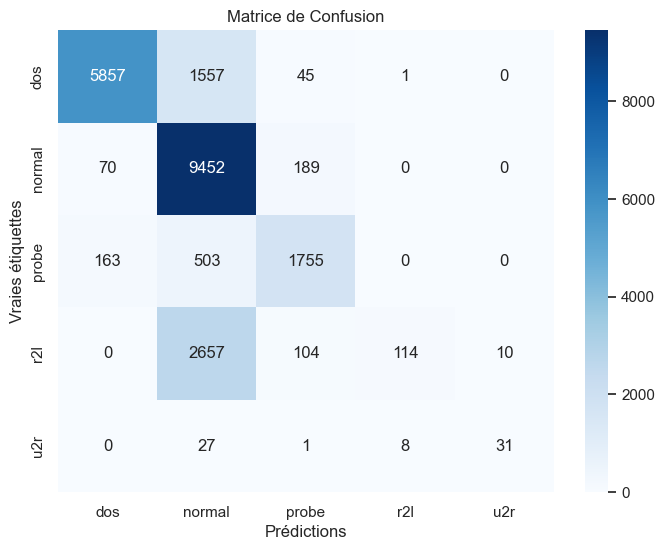


Classe 0:
True Positives (TP): 5857
True Negatives (TN): 14851
False Positives (FP): 233
False Negatives (FN): 1603

Classe 1:
True Positives (TP): 9452
True Negatives (TN): 8089
False Positives (FP): 4744
False Negatives (FN): 259

Classe 2:
True Positives (TP): 1755
True Negatives (TN): 19784
False Positives (FP): 339
False Negatives (FN): 666

Classe 3:
True Positives (TP): 114
True Negatives (TN): 19650
False Positives (FP): 9
False Negatives (FN): 2771

Classe 4:
True Positives (TP): 31
True Negatives (TN): 22467
False Positives (FP): 10
False Negatives (FN): 36


In [33]:
# Remplacez predTree par les prédictions de votre modèle et y_test par les étiquettes de test réelles
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Créer un graphique de la matrice de confusion à l'aide de seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=['dos', 'normal', 'probe', 'r2l','u2r'], yticklabels=['dos', 'normal', 'probe', 'r2l','u2r'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

# Calcul des TP, TN, FP, FN pour chaque classe
for i in range(5):
    TP = conf_matrix1[i, i]
    FP = np.sum(conf_matrix1[:, i]) - TP
    FN = np.sum(conf_matrix1[i, :]) - TP
    TN = np.sum(conf_matrix1) - TP - FP - FN
    print(f'\nClasse {i}:')
    print(f'True Positives (TP): {TP}')
    print(f'True Negatives (TN): {TN}')
    print(f'False Positives (FP): {FP}')
    print(f'False Negatives (FN): {FN}')


In [34]:
accuracy2 = np.trace(conf_matrix1) / np.sum(conf_matrix1)
print(f'Accuracy: {accuracy2:.4f}')

precision2 = np.diag(conf_matrix1) / np.sum(conf_matrix1, axis=0)
print(f'Precision: {precision2}')

recall2 = np.diag(conf_matrix1) / np.sum(conf_matrix1, axis=1)
print(f'Recall: {recall2}')

f1 = 2 * (precision2 * recall2) / (precision2 + recall2)
print(f'F1-score: {f1}')

Accuracy: 0.7634
Precision: [0.96174056 0.66582136 0.83810888 0.92682927 0.75609756]
Recall: [0.78512064 0.97332921 0.72490706 0.03951473 0.46268657]
F1-score: [0.86450185 0.79073075 0.77740864 0.07579787 0.57407407]


In [35]:
x_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

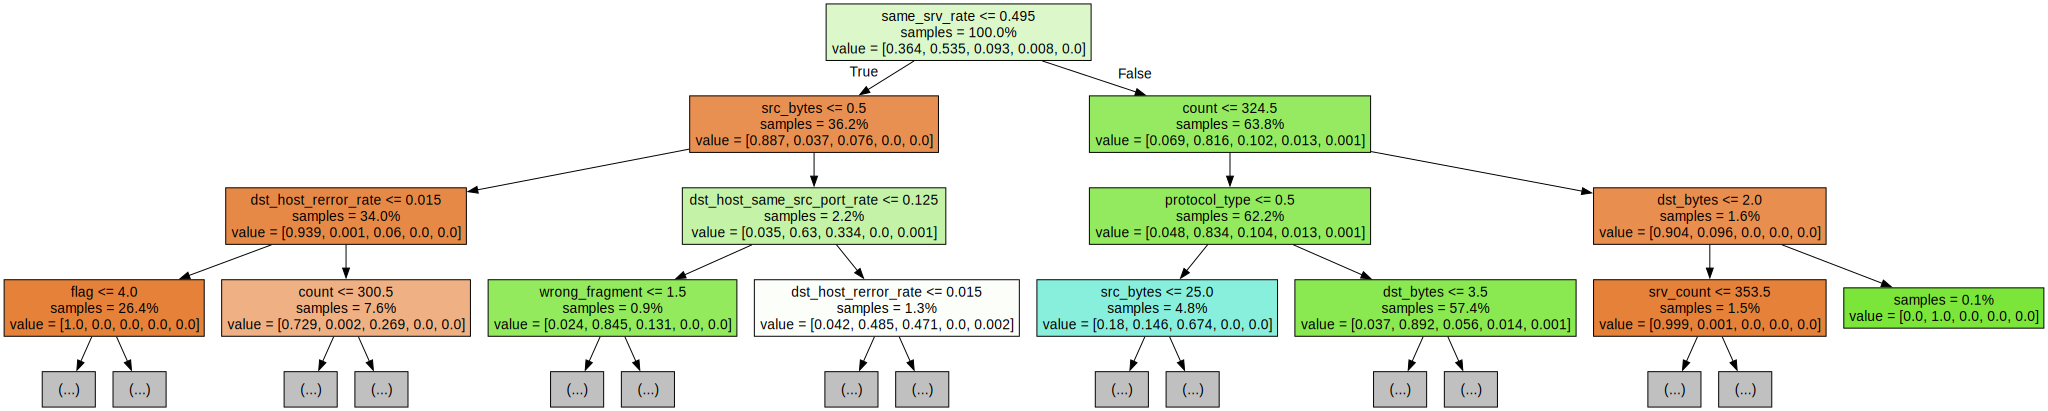

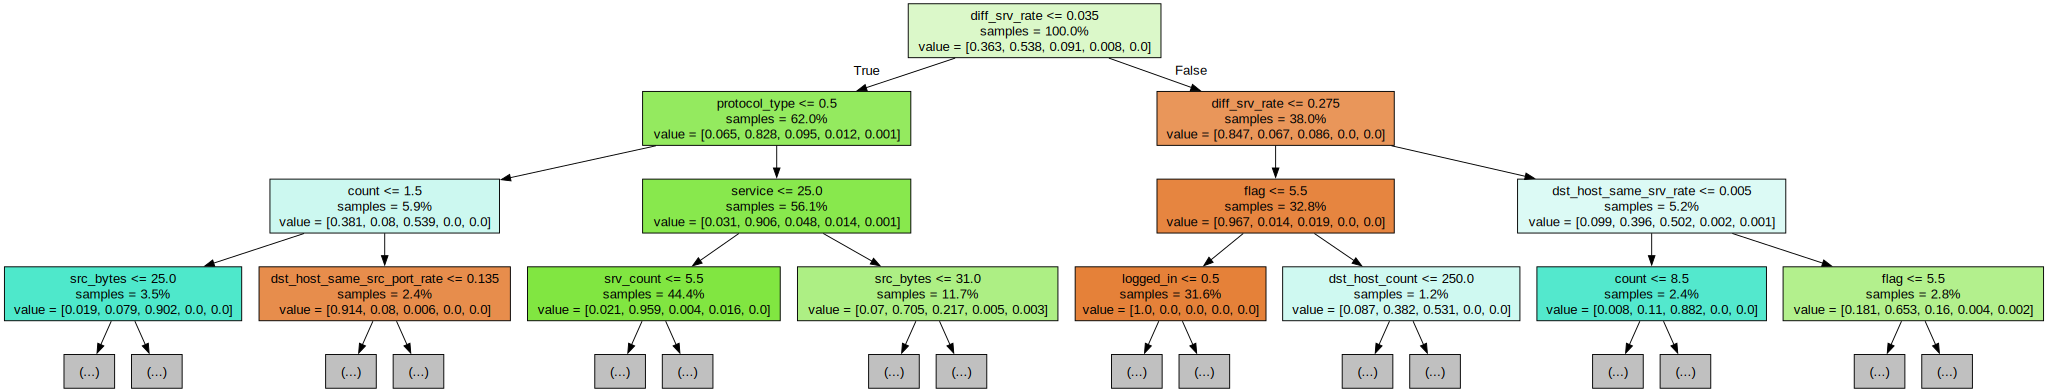

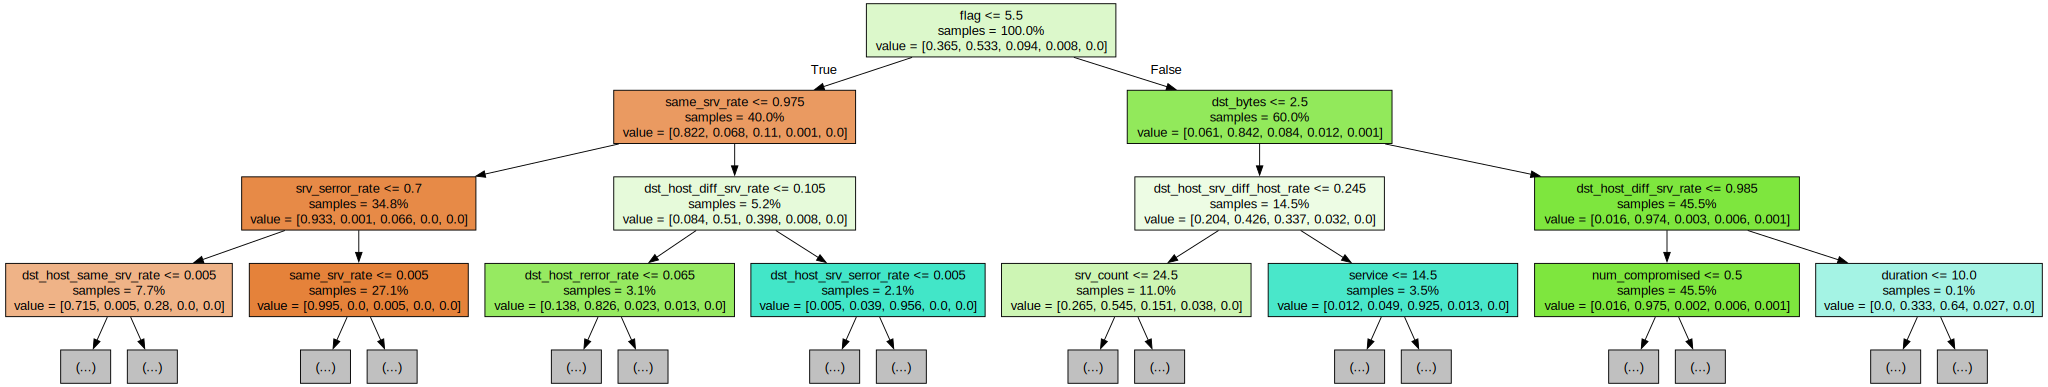

In [36]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Importance des fonctionnalités:
duration: 0.0018
protocol_type: 0.0295
service: 0.0232
flag: 0.0744
src_bytes: 0.1370
dst_bytes: 0.0556
land: 0.0001
wrong_fragment: 0.0054
urgent: 0.0000
hot: 0.0043
num_failed_logins: 0.0002
logged_in: 0.0137
num_compromised: 0.0039
root_shell: 0.0001
su_attempted: 0.0000
num_root: 0.0002
num_file_creations: 0.0001
num_shells: 0.0000
num_access_files: 0.0000
num_outbound_cmds: 0.0000
is_host_login: 0.0000
is_guest_login: 0.0007
count: 0.0452
srv_count: 0.0248
serror_rate: 0.0340
srv_serror_rate: 0.0348
rerror_rate: 0.0051
srv_rerror_rate: 0.0057
same_srv_rate: 0.0864
diff_srv_rate: 0.0957
srv_diff_host_rate: 0.0034
dst_host_count: 0.0153
dst_host_srv_count: 0.0252
dst_host_same_srv_rate: 0.0199
dst_host_diff_srv_rate: 0.0453
dst_host_same_src_port_rate: 0.0380
dst_host_srv_diff_host_rate: 0.0181
dst_host_serror_rate: 0.0410
dst_host_srv_serror_rate: 0.0383
dst_host_rerror_rate: 0.0202
dst_host_srv_rerror_rate: 0.0067
level: 0.0467


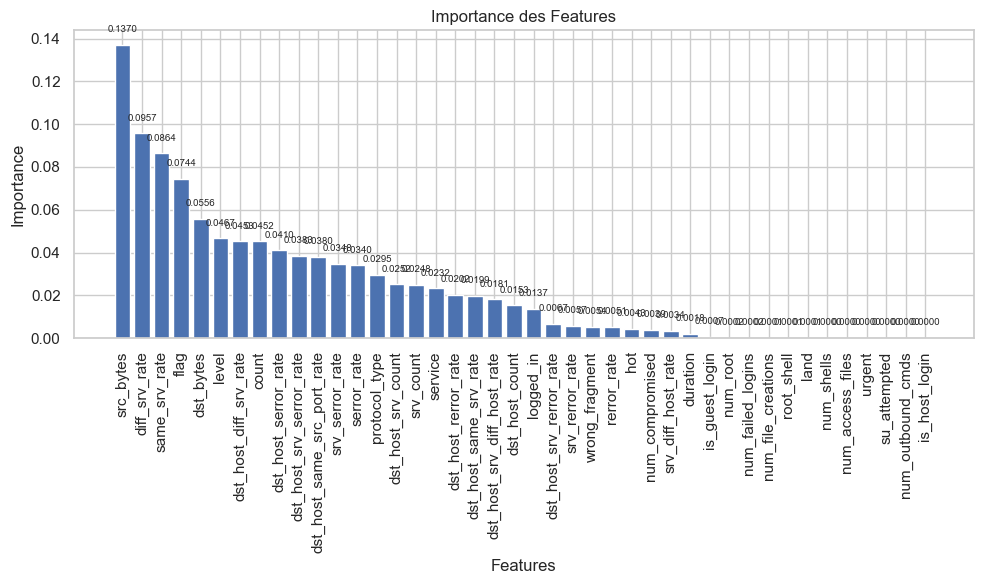

In [37]:
# Obtenez l'importance des fonctionnalités
feature_importances = rfc.feature_importances_
# Print feature importance numerically
print("Importance des fonctionnalités:")
for feature, importance in zip(x_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
    
# Print feature importance graphically
indices = np.argsort(feature_importances)[::-1]
sorted_features = [x_train.columns[i] for i in indices]
importances = [feature_importances[i] for i in indices]

plt.figure(figsize=(10, 6))

# Affichez les barres
bars = plt.bar(range(x_train.shape[1]), importances)

# Affichez les valeurs au-dessus des barres
for i, (bar, importance) in enumerate(zip(bars, importances)):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        importance + 0.005,
        f"{importance:.4f}",
        ha="center",
        va="bottom",
        fontsize=7,
    )

# Affichez les noms des features (Display feature names)
plt.xticks(range(x_train.shape[1]), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Importance des Features")
plt.tight_layout()
plt.show()

In [38]:
# Définissez un seuil de signification
threshold = 0.0068

# Conservez uniquement les fonctionnalités dont l'importance est supérieure au seuil
important_features = [feature for feature, importance in zip(x_train.columns, feature_importances) if importance > threshold]


In [39]:
x_train_important=x_train[important_features]
x_test_important=x_test[important_features]


In [40]:
rfc_important = RandomForestClassifier(random_state=0,max_depth=18)
# fit the model
rfc_important.fit(x_train_important, y_train)
# Predict the Test set results
y_pred = rfc_important.predict(x_test_important)
y_pred

array(['dos', 'dos', 'normal', ..., 'dos', 'normal', 'probe'],
      dtype=object)

Importance des fonctionnalités:
protocol_type: 0.0317
service: 0.0205
flag: 0.0707
src_bytes: 0.1746
dst_bytes: 0.0389
logged_in: 0.0234
count: 0.0643
srv_count: 0.0193
serror_rate: 0.0180
srv_serror_rate: 0.0286
same_srv_rate: 0.0943
diff_srv_rate: 0.0786
dst_host_count: 0.0109
dst_host_srv_count: 0.0250
dst_host_same_srv_rate: 0.0243
dst_host_diff_srv_rate: 0.0372
dst_host_same_src_port_rate: 0.0318
dst_host_srv_diff_host_rate: 0.0171
dst_host_serror_rate: 0.0573
dst_host_srv_serror_rate: 0.0555
dst_host_rerror_rate: 0.0217
level: 0.0564


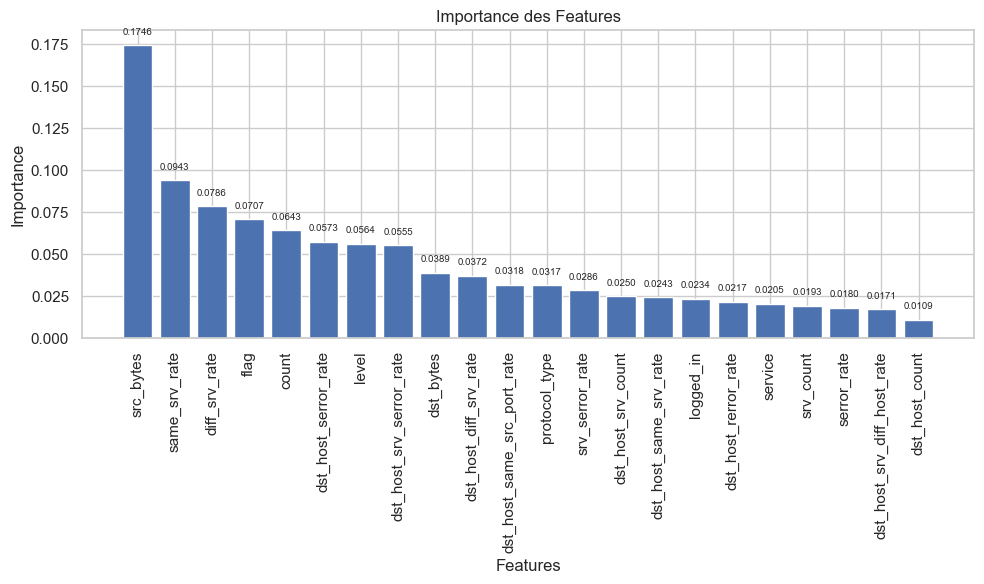

In [41]:
# Obtenez l'importance des fonctionnalités
feature_importances = rfc_important.feature_importances_
# Affichez l'importance des fonctionnalités de manière numérique
print("Importance des fonctionnalités:")
for feature, importance in zip(x_train_important.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
    
# Affichez l'importance des fonctionnalités de manière graphique
indices = np.argsort(feature_importances)[::-1]
sorted_features = [x_train_important.columns[i] for i in indices]
importances = [feature_importances[i] for i in indices]

plt.figure(figsize=(10, 6))

# Affichez les barres
bars = plt.bar(range(x_train_important.shape[1]), importances)

# Affichez les valeurs au-dessus des barres
for i, (bar, importance) in enumerate(zip(bars, importances)):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        importance + 0.005,
        f"{importance:.4f}",
        ha="center",
        va="bottom",
        fontsize=7,
    )

# Affichez les noms des features
plt.xticks(range(x_train_important.shape[1]), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Importance des Features")
plt.tight_layout()
plt.show()

In [42]:
tree_depths = []
for estimator in rfc_important.estimators_:
	tree_depths.append(estimator.get_depth())

print(f"Depths of all trees: {tree_depths}")

Depths of all trees: [18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


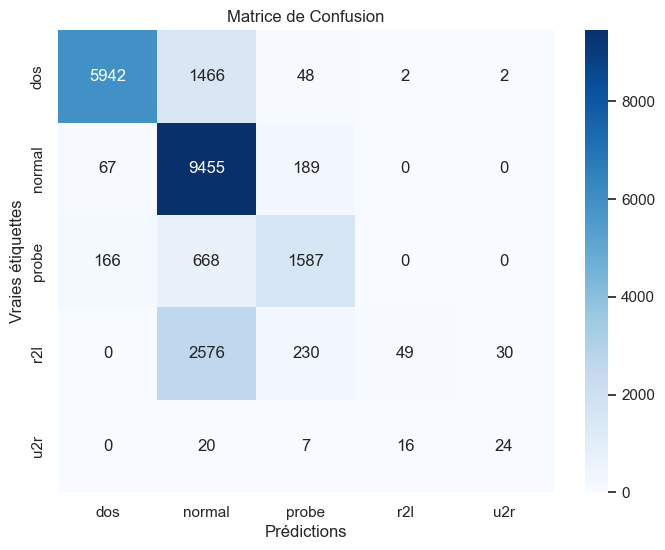


Classe 0:
True Positives (TP): 5942
True Negatives (TN): 14851
False Positives (FP): 233
False Negatives (FN): 1518

Classe 1:
True Positives (TP): 9455
True Negatives (TN): 8103
False Positives (FP): 4730
False Negatives (FN): 256

Classe 2:
True Positives (TP): 1587
True Negatives (TN): 19649
False Positives (FP): 474
False Negatives (FN): 834

Classe 3:
True Positives (TP): 49
True Negatives (TN): 19641
False Positives (FP): 18
False Negatives (FN): 2836

Classe 4:
True Positives (TP): 24
True Negatives (TN): 22445
False Positives (FP): 32
False Negatives (FN): 43


In [43]:
# Remplacez predTree par les prédictions de votre modèle et y_test par les étiquettes de test réelles
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Créer un graphique de la matrice de confusion à l'aide de seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=['dos', 'normal', 'probe', 'r2l','u2r'], yticklabels=['dos', 'normal', 'probe', 'r2l','u2r'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

# Calcul des TP, TN, FP, FN pour chaque classe
for i in range(5):
    TP = conf_matrix2[i, i]
    FP = np.sum(conf_matrix2[:, i]) - TP
    FN = np.sum(conf_matrix2[i, :]) - TP
    TN = np.sum(conf_matrix2) - TP - FP - FN
    print(f'\nClasse {i}:')
    print(f'True Positives (TP): {TP}')
    print(f'True Negatives (TN): {TN}')
    print(f'False Positives (FP): {FP}')
    print(f'False Negatives (FN): {FN}')


In [44]:
accuracy = np.trace(conf_matrix2) / np.sum(conf_matrix2)
print(f'Accuracy: {accuracy:.4f}')

precision = np.diag(conf_matrix2) / np.sum(conf_matrix2, axis=0)
print(f'Precision: {precision}')

recall = np.diag(conf_matrix2) / np.sum(conf_matrix2, axis=1)
print(f'Recall: {recall}')

f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1}')


Accuracy: 0.7566
Precision: [0.96226721 0.66654917 0.77001456 0.73134328 0.42857143]
Recall: [0.79651475 0.97363814 0.65551425 0.0169844  0.35820896]
F1-score: [0.87158049 0.79134583 0.708166   0.03319783 0.3902439 ]


### Normalization

In [45]:

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(x_train)

normalized_dataset = pd.DataFrame(normalized_data, columns=x_train.columns)

normalized_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000


# Normalization (test dataset)

In [46]:
scaler = MinMaxScaler()

normalized_data_test = scaler.fit_transform(x_test)

normalized_dataset_test = pd.DataFrame(normalized_data_test, columns=x_test.columns)

normalized_dataset_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,...,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,...,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,...,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0.523810


### Feature Selection

In [47]:

# Initialize SelectKBest with ANOVA F-value scoring function
k_best = SelectKBest(score_func=f_classif)  # No 'k' specified

# Fit SelectKBest to your data
k_best.fit(x_train, y_train)

# Get ANOVA F-value scores and corresponding p-values for each feature
f_scores = k_best.scores_
p_values = k_best.pvalues_

# Create a DataFrame to display F-scores and p-values for each feature
feature_scores = pd.DataFrame({'Feature': x_train.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort features by F-Score in descending order
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

# Print the sorted feature scores
print("Feature Scores (ANOVA F-values):")
print(feature_scores)
print("************************************")

# Assuming 'threshold' is your chosen threshold for feature selection based on F-Score
threshold = 5.0  # Adjust this threshold according to your requirements

# Filter features based on the threshold
selected_features = feature_scores[feature_scores['F-Score'] > threshold]['Feature']

# Keep only the top 35 features (adjust as needed)
selected_features = selected_features.head(35)

# Print the selected features
print("Selected Features:")
print(selected_features)

#The top features have the highest discriminatory power
#Features with high F-Scores and very low p-values are considered highly significant
#low p-values, indicating that these features are likely important in distinguishing between different classes.
#Features with lower F-Scores or higher p-values may not contribute significantly to the differences between groups.

Feature Scores (ANOVA F-values):
                        Feature       F-Score        P-Value
28                same_srv_rate  68019.322978   0.000000e+00
38     dst_host_srv_serror_rate  53077.343979   0.000000e+00
37         dst_host_serror_rate  52121.809084   0.000000e+00
24                  serror_rate  51426.256978   0.000000e+00
25              srv_serror_rate  51163.930644   0.000000e+00
32           dst_host_srv_count  34623.879617   0.000000e+00
33       dst_host_same_srv_rate  34104.242716   0.000000e+00
11                    logged_in  31959.248487   0.000000e+00
3                          flag  25353.218409   0.000000e+00
22                        count  21428.453147   0.000000e+00
41                        level  20146.164359   0.000000e+00
35  dst_host_same_src_port_rate  13778.651009   0.000000e+00
34       dst_host_diff_srv_rate  13102.639925   0.000000e+00
31               dst_host_count   9432.924088   0.000000e+00
36  dst_host_srv_diff_host_rate   8175.899871   0.00

In [48]:
# Assuming 'normalized_dataset' is your DataFrame with the normalized features
# Filter the dataset to keep only the selected features
selected_features_list = selected_features.tolist()  # Convert selected_features to a list

filtered_dataset = normalized_dataset[selected_features_list]
# Adding 'attack' assuming you want to keep the target column

# Display the first few rows of the filtered dataset
filtered_dataset.head()
filtered_dataset_with_target = pd.concat([filtered_dataset, y_train], axis=1)
filtered_dataset_with_target

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,...,duration,num_shells,wrong_fragment,num_failed_logins,srv_count,num_file_creations,num_access_files,urgent,su_attempted,attack
0,1.00,0.00,0.00,0.0,0.0,0.098039,0.17,0.0,0.9,0.003914,...,0.000000,0.0,0.0,0.0,0.003914,0.0,0.0,0.0,0.0,normal
1,0.08,0.00,0.00,0.0,0.0,0.003922,0.00,0.0,0.9,0.025440,...,0.000000,0.0,0.0,0.0,0.001957,0.0,0.0,0.0,0.0,normal
2,0.05,1.00,1.00,1.0,1.0,0.101961,0.10,0.0,0.5,0.240705,...,0.000000,0.0,0.0,0.0,0.011742,0.0,0.0,0.0,0.0,dos
3,1.00,0.01,0.03,0.2,0.2,1.000000,1.00,1.0,0.9,0.009785,...,0.000000,0.0,0.0,0.0,0.009785,0.0,0.0,0.0,0.0,normal
4,1.00,0.00,0.00,0.0,0.0,1.000000,1.00,1.0,0.9,0.058708,...,0.000000,0.0,0.0,0.0,0.062622,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.14,1.00,1.00,1.0,1.0,0.098039,0.10,0.0,0.5,0.360078,...,0.000000,0.0,0.0,0.0,0.048924,0.0,0.0,0.0,0.0,dos
125969,1.00,0.00,0.00,0.0,0.0,0.956863,0.96,0.0,0.9,0.003914,...,0.000186,0.0,0.0,0.0,0.003914,0.0,0.0,0.0,0.0,normal
125970,1.00,0.00,0.72,0.0,0.0,0.117647,0.12,1.0,0.9,0.001957,...,0.000000,0.0,0.0,0.0,0.001957,0.0,0.0,0.0,0.0,normal
125971,0.06,1.00,1.00,1.0,1.0,0.031373,0.03,0.0,0.5,0.281800,...,0.000000,0.0,0.0,0.0,0.015656,0.0,0.0,0.0,0.0,dos


In [49]:

# Assuming 'normalized_dataset' is your DataFrame with the normalized features
# Filter the dataset to keep only the selected features
selected_features_list = selected_features.tolist()  # Convert selected_features to a list

filtered_dataset_test = normalized_dataset_test[selected_features_list]
# Adding 'attack' assuming you want to keep the target column

# Display the first few rows of the filtered dataset
filtered_dataset_test.head()
filtered_dataset_test_with_target = pd.concat([filtered_dataset_test, y_test], axis=1)
filtered_dataset_test_with_target

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,...,duration,num_shells,wrong_fragment,num_failed_logins,srv_count,num_file_creations,num_access_files,urgent,su_attempted,attack
0,0.04,0.0,0.00,0.0,0.00,0.039216,0.04,0.0,0.1,0.448141,...,0.000000,0.0,0.0,0.0,0.019569,0.0,0.0,0.0,0.0,dos
1,0.01,0.0,0.00,0.0,0.00,0.003922,0.00,0.0,0.1,0.266145,...,0.000000,0.0,0.0,0.0,0.001957,0.0,0.0,0.0,0.0,dos
2,1.00,0.0,0.00,0.0,0.00,0.337255,0.61,0.0,0.9,0.001957,...,0.000035,0.0,0.0,0.0,0.001957,0.0,0.0,0.0,0.0,normal
3,1.00,0.0,0.00,0.0,0.00,0.223529,1.00,0.0,0.9,0.001957,...,0.000000,0.0,0.0,0.0,0.127202,0.0,0.0,0.0,0.0,probe
4,1.00,0.0,0.00,0.0,0.12,0.337255,0.31,0.0,0.2,0.001957,...,0.000017,0.0,0.0,0.0,0.015656,0.0,0.0,0.0,0.0,probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.00,0.0,0.01,0.0,0.00,0.552941,0.72,1.0,0.9,0.001957,...,0.000000,0.0,0.0,0.0,0.001957,0.0,0.0,0.0,0.0,normal
22540,1.00,0.0,0.01,0.0,0.00,1.000000,1.00,1.0,0.9,0.003914,...,0.000000,0.0,0.0,0.0,0.021526,0.0,0.0,0.0,0.0,normal
22541,1.00,0.0,0.00,0.0,0.00,1.000000,1.00,1.0,0.9,0.009785,...,0.000000,0.0,0.0,0.0,0.019569,0.0,0.0,0.0,0.0,dos
22542,1.00,0.0,0.00,0.0,0.00,0.988235,0.99,0.0,0.9,0.007828,...,0.000000,0.0,0.0,0.0,0.011742,0.0,0.0,0.0,0.0,normal


### KNN :

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap
import numpy as np

In [51]:
x_train = filtered_dataset_with_target.drop(columns=['attack']) 
y_train = filtered_dataset_with_target['attack']
x_test = filtered_dataset_test_with_target.drop(columns=['attack']) 
y_test = filtered_dataset_test_with_target['attack']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
#created new instance of (knn) with n_neighbors=30.
knn = KNeighborsClassifier(30)
knn_model = knn.fit(x_train, y_train)
#make predictions on the test set (x_test), predicted labels are stored in y_pred_knn
y_pred_knn = knn_model.predict(x_test)
#Accuracy
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
k=print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.78


-Accuracy of K-NN classifier on training set: 1.00" indicates that the model achieved perfect accuracy on the training data, correctly classifying all instances.

-On test set: 0.78" indicates the accuracy of the model on previously unseen data. In this case, the model correctly classified approximately 78% of the instances in the test set.

In [53]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         dos       0.92      0.81      0.87      7460
      normal       0.72      0.97      0.83      9711
       probe       0.67      0.76      0.72      2421
         r2l       0.86      0.05      0.09      2885
         u2r       0.77      0.34      0.47        67

    accuracy                           0.78     22544
   macro avg       0.79      0.59      0.60     22544
weighted avg       0.80      0.78      0.73     22544




Classe 0:
True Positives (TP): 6076
True Negatives (TN): 14578
False Positives (FP): 506
False Negatives (FN): 1384

Classe 1:
True Positives (TP): 9383
True Negatives (TN): 9194
False Positives (FP): 3639
False Negatives (FN): 328

Classe 2:
True Positives (TP): 1850
True Negatives (TN): 19230
False Positives (FP): 893
False Negatives (FN): 571

Classe 3:
True Positives (TP): 144
True Negatives (TN): 19636
False Positives (FP): 23
False Negatives (FN): 2741

Classe 4:
True Positives (TP): 23
True Negatives (TN): 22470
False Positives (FP): 7
False Negatives (FN): 44


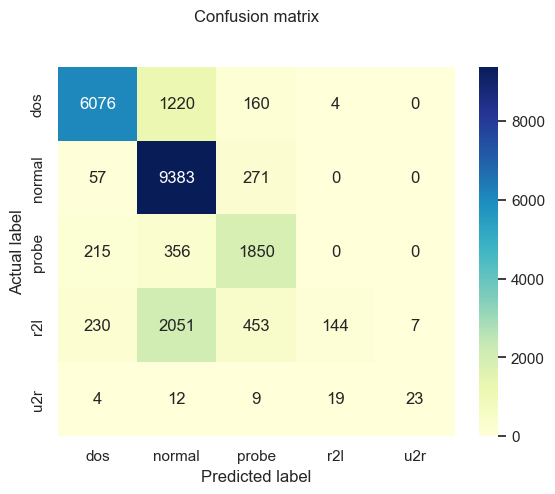

In [71]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap="YlGnBu", xticklabels=['dos', 'normal', 'probe', 'r2l','u2r'], yticklabels=['dos', 'normal', 'probe', 'r2l','u2r'])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Calcul des TP, TN, FP, FN pour chaque classe
for i in range(5):
    TP = cnf_matrix[i, i]
    FP = np.sum(cnf_matrix[:, i]) - TP
    FN = np.sum(cnf_matrix[i, :]) - TP
    TN = np.sum(cnf_matrix) - TP - FP - FN
    print(f'\nClasse {i}:')
    print(f'True Positives (TP): {TP}')
    print(f'True Negatives (TN): {TN}')
    print(f'False Positives (FP): {FP}')
    print(f'False Negatives (FN): {FN}')

### Naive Bayes :

In [55]:
from sklearn.naive_bayes import GaussianNB
# creates an instance of the Gaussian Naive Bayes model
# gnb sed to train the model and make predictions.
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
y_pred

array(['dos', 'dos', 'probe', ..., 'dos', 'probe', 'probe'], dtype='<U6')

In [56]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4666


In [57]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array(['dos', 'probe', 'dos', ..., 'dos', 'dos', 'dos'], dtype='<U6')

In [58]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.5052


Check for overfitting and underfitting¶


In [59]:
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.5052
Test set score: 0.4666


 A low test score indicates overfitting, This means that the model may perform poorly on the test set.

In [60]:
y_test.value_counts()


attack
normal    9711
dos       7460
r2l       2885
probe     2421
u2r         67
Name: count, dtype: int64

The "normal" class has the highest number of occurrences (9711).

In [61]:
# "null accuracy" would be the precision we would get if we always predict "normal"
null_accuracy = (9711/(9711+7460+2885+2421+67))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.4308


-This means that if our model always predicted the "normal" class, it would have an accuracy of about 43.08%. In other words, if our model doesn’t do better than this value, it might not be very informative, as it doesn’t bring any significant improvement over the simple prediction of the majority class. When evaluating the performance of our model, we should ensure that it has greater accuracy than "null accuracy" to be considered useful.

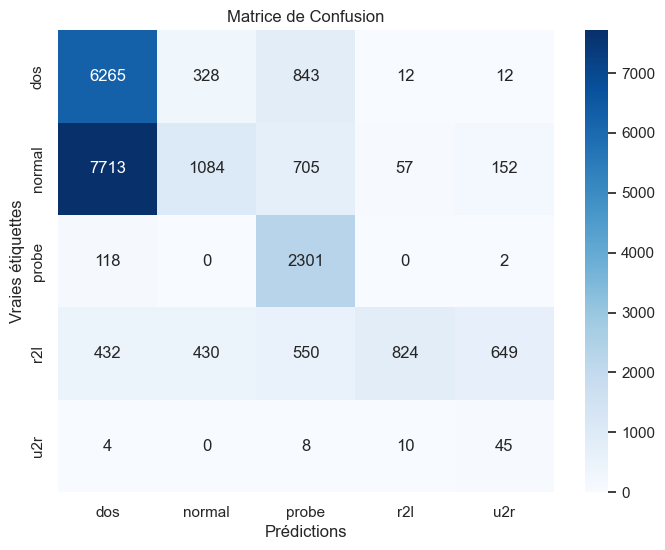


Classe 0:
True Positives (TP): 6265
True Negatives (TN): 6817
False Positives (FP): 8267
False Negatives (FN): 1195

Classe 1:
True Positives (TP): 1084
True Negatives (TN): 12075
False Positives (FP): 758
False Negatives (FN): 8627

Classe 2:
True Positives (TP): 2301
True Negatives (TN): 18017
False Positives (FP): 2106
False Negatives (FN): 120

Classe 3:
True Positives (TP): 824
True Negatives (TN): 19580
False Positives (FP): 79
False Negatives (FN): 2061

Classe 4:
True Positives (TP): 45
True Negatives (TN): 21662
False Positives (FP): 815
False Negatives (FN): 22


In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer un graphique de la matrice de confusion à l'aide de seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['dos', 'normal', 'probe', 'r2l','u2r'], yticklabels=['dos', 'normal', 'probe', 'r2l','u2r'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()
for i in range(5):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN
    print(f'\nClasse {i}:')
    print(f'True Positives (TP): {TP}')
    print(f'True Negatives (TN): {TN}')
    print(f'False Positives (FP): {FP}')
    print(f'False Negatives (FN): {FN}')

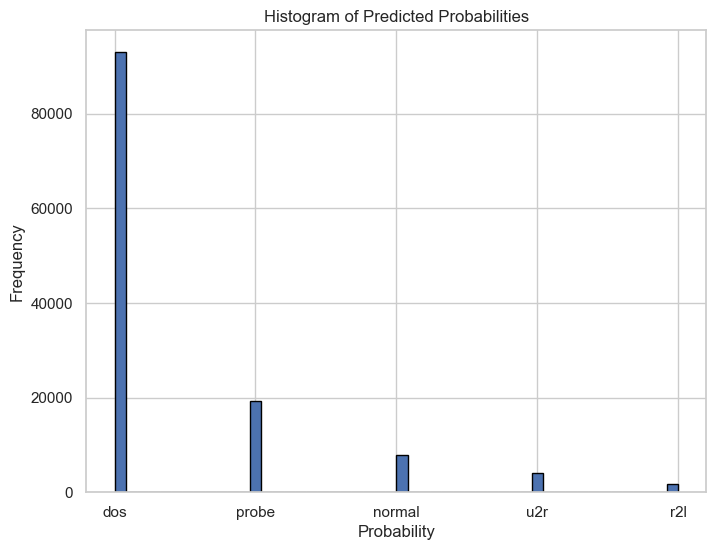

In [63]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Assuming you have defined the x_train and y_train variables

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(x_train, y_train)

# Make predictions
y_pred_train = gnb.predict(x_train)

# Get the predicted probabilities for the positive class
predicted_proba = y_pred_train

# Plot a histogram for predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(predicted_proba, bins=50, edgecolor='black')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

### SVM :

In [64]:
category_mapping = {'normal':0,'dos': 1, 'probe': 2, 'r2l': 3, 'u2r': 4}

# Appliquer le mapping à la colonne 'attack'
y_te1= dataset_ts['attack'].map(category_mapping)
y_test_svm = np.asarray(y_te1)

X3=filtered_dataset_test.copy()
X3.info
X_test_svm = np.asarray(X3)
y1= dataset_ta['attack'].map(category_mapping)
y_train_svm = np.asarray(y1)
X1 = filtered_dataset.copy()
X_train_svm = np.asarray(X1)


In [65]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_svm, y_train_svm) 
ypred2 = clf.predict(X_test_svm)
print("Avg F1-score: %.4f" % f1_score(y_test_svm, ypred2, average='weighted'))

Avg F1-score: 0.7782


-An F1-score of 0.7782 suggests that the model has a good combination of precision and recall, and it manages to generalize well on the test 

from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      9711
           1       0.94      0.87      0.90      7460
           2       0.66      0.80      0.73      2421
           3       0.98      0.14      0.25      2885
           4       0.64      0.43      0.52        67

    accuracy                           0.81     22544
   macro avg       0.80      0.64      0.65     22544
weighted avg       0.84      0.81      0.78     22544

Confusion matrix, without normalization
[[9397   83  230    1    0]
 [ 902 6468   88    0    2]
 [ 377  104 1940    0    0]
 [1586  225  647  413   14]
 [   5    4   23    6   29]]


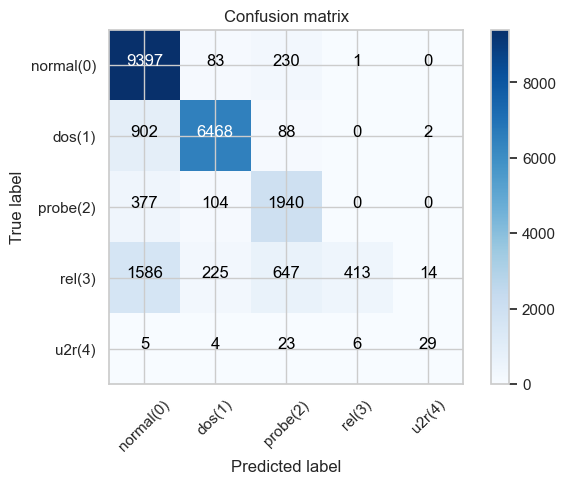

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_svm, ypred2, labels=[0, 1, 2, 3, 4])
np.set_printoptions(precision=2)

print (classification_report(y_test_svm, ypred2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal(0)','dos(1)','probe(2)','r2l(3)','u2r(4)'],normalize= False,  title='Confusion matrix')